In [1]:
import pandas as pd
df=pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


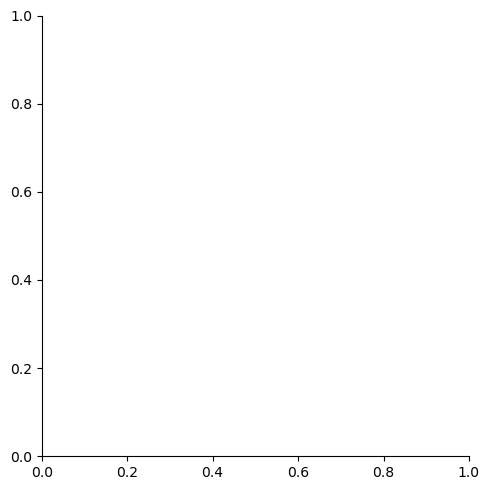

In [2]:
import seaborn as sns
sns.relplot()

In [3]:
from sklearn.preprocessing import LabelEncoder
com=LabelEncoder()
job=LabelEncoder()
deg=LabelEncoder()

In [4]:
df['ncom']=com.fit_transform(df.company)
df['njob']=job.fit_transform(df.job)
df['ndeg']=deg.fit_transform(df.degree)
df.head()

,company,job,degree,salary_more_then_100k,ncom,njob,ndeg
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0


In [5]:
final=df.drop(['company','job','degree'],axis='columns')
final

,salary_more_then_100k,ncom,njob,ndeg
0,0,2,2,0
1,0,2,2,1
2,1,2,0,0
3,1,2,0,1
4,0,2,1,0
5,1,2,1,1
6,0,0,2,1
7,0,0,1,0
8,0,0,0,0
9,1,0,0,1


In [6]:
inputs=final.drop('salary_more_then_100k', axis='columns')

In [7]:
target=df.salary_more_then_100k

In [8]:
from sklearn.model_selection import train_test_split as tst
X_train, X_test, y_train, y_test=tst(inputs,target, test_size=0.2, random_state=10)

In [9]:
from sklearn import tree
mod=tree.DecisionTreeClassifier()
mod.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

[Text(0.6, 0.9, 'salary_more_then_100k <= 1.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]\nclass = google'),
 Text(0.4, 0.7, 'salary_more_then_100k <= 0.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = google'),
 Text(0.3, 0.5, 'ncom <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = google'),
 Text(0.2, 0.3, 'njob <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = google'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = google'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = google'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = google'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = google'),
 Text(0.8, 0.7, 'ncom <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = google'),
 Text(0.7, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = google'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = google')]

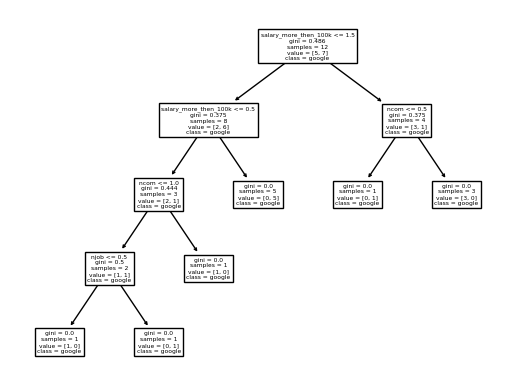

In [13]:
tree.plot_tree(mod, feature_names=['salary_more_then_100k','ncom','njob','ndeg'], class_names=df.company)

In [14]:
mod.predict([[2,2,0]])

C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [15]:
mod.score(X_test,y_test)

0.75

In [16]:
mod.predict_proba(X_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [17]:
y_predicted=mod.predict(X_test)
from sklearn.metrics import mean_squared_error as mse
x=mse(y_test,y_predicted)
x

0.25

In [18]:
from sklearn.metrics import confusion_matrix as cm
x=cm(y_test,y_predicted)
x

array([[1, 0],
       [1, 2]], dtype=int64)

<Axes: >

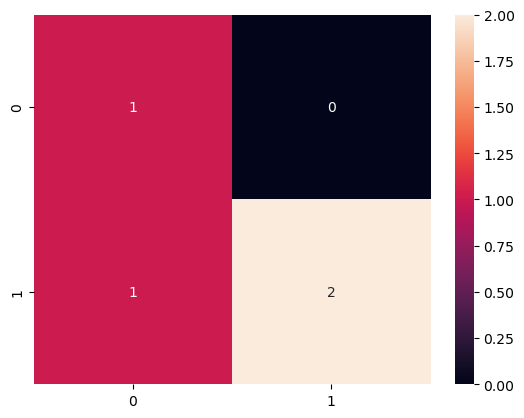

In [19]:
sns.heatmap(x, annot=True)